## On crée notre MainGrid.

In [67]:
from MainGrid import MainGrid

main_grid = MainGrid()

Cette MainGrid est composée de 8 CEMS (Community Energy Management System).

In [68]:
cems = main_grid.schedule.agents[0]
cems

Et chaque CEMS est composé de 1000 HEMS (Home Energy Management System).

In [69]:
hems = cems.schedule.agents[0]
hems

Chaque HEMS possède un DemandAgent qui choisit un mode de consommation (vert, bas coût ou stable).

In [70]:
hems.a_demand.mode

'stable'

In [71]:
# Au niveau de la cems
cems.repart

{'vert': 322, 'stable': 349, 'bas coût': 329}

Cela permet de prédire la consommation de la cems. 
D'abord, en simulant une consommation passée.

In [72]:
from data import get_consumption_yesterday
conso_hier = get_consumption_yesterday(cems.repart)
conso_hier

[403.25899817879485,
 361.57292683949345,
 358.2657426405588,
 364.0636037092926,
 356.81190715613536,
 354.64267964332726,
 397.6232011984769,
 397.1079069713045,
 427.00587331438624,
 423.1951970094465,
 424.65091109959985,
 416.985462020082,
 439.0383069051287,
 419.3485565230218,
 421.4492244425469,
 406.251636328808,
 404.3337329721244,
 404.03732604964705,
 401.0673273133201,
 404.765716110068,
 421.4562992646975,
 415.92190855421825,
 406.3256494445001,
 403.65189434761396]

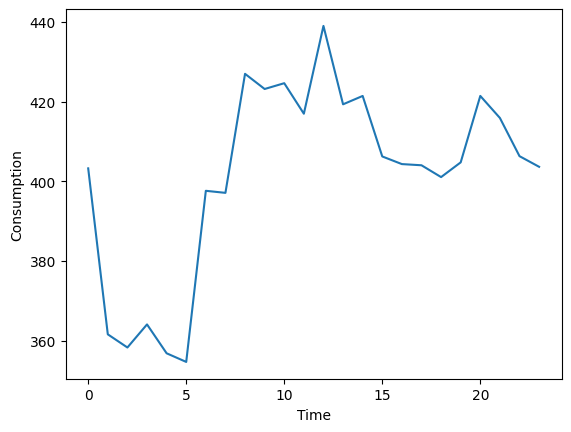

In [73]:
import matplotlib.pyplot as plt
plt.plot(conso_hier)
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()

Puis de prédire une consommation pour aujourd'hui en lissant la consommation d'hier. 

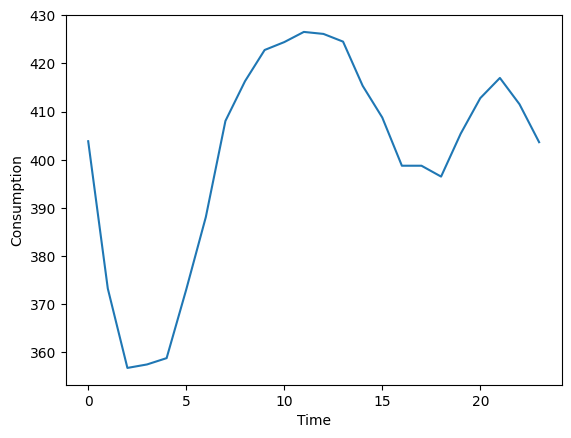

In [74]:
from data import pred_consumption

pred = pred_consumption(cems.repart)
plt.plot(pred)
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()

## On a donc accès à la prédiction pour les 8 communautés cumulées.

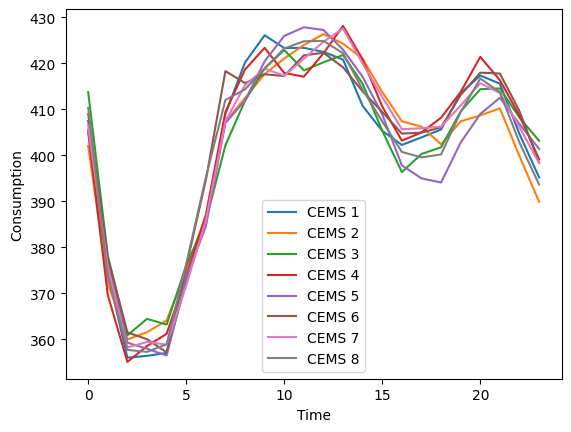

In [75]:
for i in range(8):
    plt.plot(main_grid.pred_consumption[i])
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.legend(['CEMS 1', 'CEMS 2', 'CEMS 3', 'CEMS 4', 'CEMS 5', 'CEMS 6', 'CEMS 7', 'CEMS 8'])
plt.show()

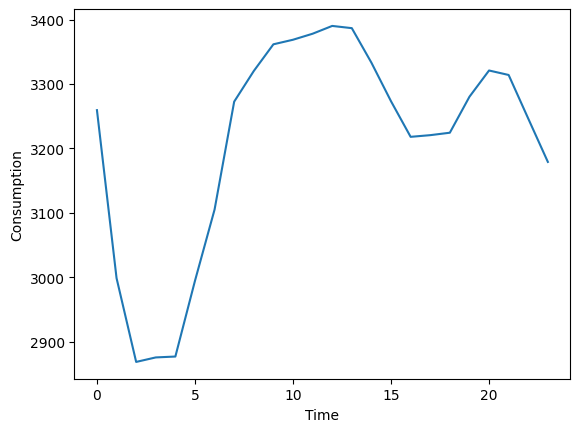

In [76]:
# on somme toutes les prédictions
sum_pred = [0 for i in range(24)]
for i in range(8):
    sum_pred = [sum_pred[j] + main_grid.pred_consumption[i][j] for j in range(24)]
plt.plot(sum_pred)
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()

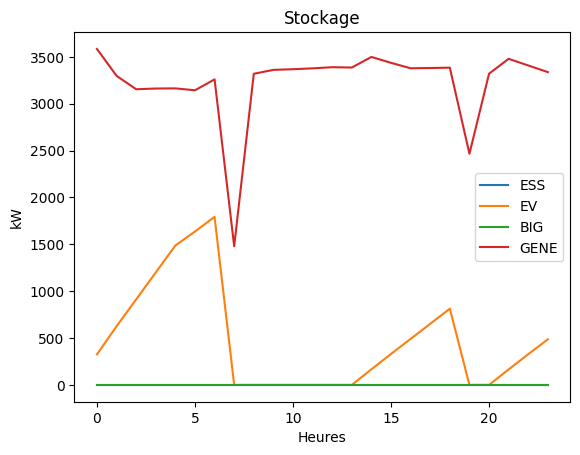

In [77]:
main_grid.step()
plt.plot([sum(val) for val in main_grid.ess[1:]])
plt.plot([sum(val) for val in main_grid.ev[1:]])
plt.plot([val for val in main_grid.l_big[1:]])
plt.plot([sum(val) for val in main_grid.gene[1:]])
plt.ylabel('kW')
plt.xlabel('Heures')
plt.title('Stockage')
plt.legend(['ESS', 'EV', 'BIG', 'GENE'])